In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import *
from matplotlib.dates import DateFormatter
from matplotlib.ticker import AutoMinorLocator
from notebook_utils import configure_path, setup_matplotlib

In [2]:
configure_path()
setup_matplotlib()

## Availability of DNS Infrastructure

To analyze the country’s availability of infrastructure running critical Internet services, we use DNS as a representative example.

The proximity to root DNS servers is key in enhancing user experience by minimizing DNS resolution times. Given the importance of DNS in Internet communications, various stakeholders have advocated for the expansion of the root DNS network. As an example of this in Latin America, LACNIC leads this effort through the +Raices (+Roots) program, in which LACNIC intermediates between hosting sites and root DNS servers to deploy root servers in the region.

Determining the location of these servers is a known challenge since root DNS are reachable through anycast. To address this challenge, we use RIPE Atlas’ built-in measurements to retrieve CHAOS TXT records collected from Venezuela and the LACNIC region probes, targeting all root DNS servers since 2016. CHAOS TXT records enable network operators to identify specific anycast servers being accessed, typically codified with strings containing embedded airport codes, as otherwise, each instance responds with the same address. Utilizing RIPE Atlas’ built-in measurements, conducted every 30 minutes targeting all root DNS servers, our dataset includes measurements only from the first five days of each month. We develop regular expressions to extract these codes from each of the 13 different types of responses, and we then map these codes to their corresponding countries and cities.

In [3]:
# Utils
def str2dt(t):
    return datetime.strptime(t[:-2] + "01", "%Y-%m-%d")

In [4]:
chaos = pd.read_csv(
    "data/processed/06-16-chaos-txt/chaos_count.csv",
    names=["cc", "date", "string", "city", "lat-lon"],
)
chaos["date"] = chaos["date"].map(str2dt)

In [5]:
chaos.head()

,cc,date,string,city,lat-lon
0,AR,2016-01-01,nqar1.droot,Neuquen,"-38.949001,-68.155701"
1,AR,2016-01-01,nqar2.droot,Neuquen,"-38.949001,-68.155701"
2,AR,2016-01-01,1.1.e.nqn.pch.net,Neuquen,"-38.949001,-68.155701"
3,AR,2016-01-01,2.1.e.nqn.pch.net,Neuquen,"-38.949001,-68.155701"
4,AR,2016-01-01,eze1a.f.root-servers.org,Buenos Aires,"-34.8222,-58.5358"


In [6]:
country_styles = {
    "AR": {"alpha": 0.75, "lw": 2, "color": "C0", "label": "AR"},
    "AW": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BZ": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BO": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BQ": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BR": {"alpha": 0.75, "lw": 2, "color": "C1", "label": "BR"},
    "CL": {"alpha": 0.75, "lw": 2, "color": "C2", "label": "CL"},
    "UY": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "CR": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "CU": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "CW": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "DO": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "EC": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "SV": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "FK": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GF": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GT": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GY": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "HT": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "HN": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "MX": {"alpha": 0.75, "lw": 2, "color": "C3", "label": "MX"},
    "NI": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "PA": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "PY": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "PE": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "SX": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GS": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "SR": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "TT": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "CO": {"alpha": 0.75, "lw": 2, "color": "C5", "label": "CO"},
    "VE": {"alpha": 0.75, "lw": 2, "color": "purple", "label": "VE"},
}

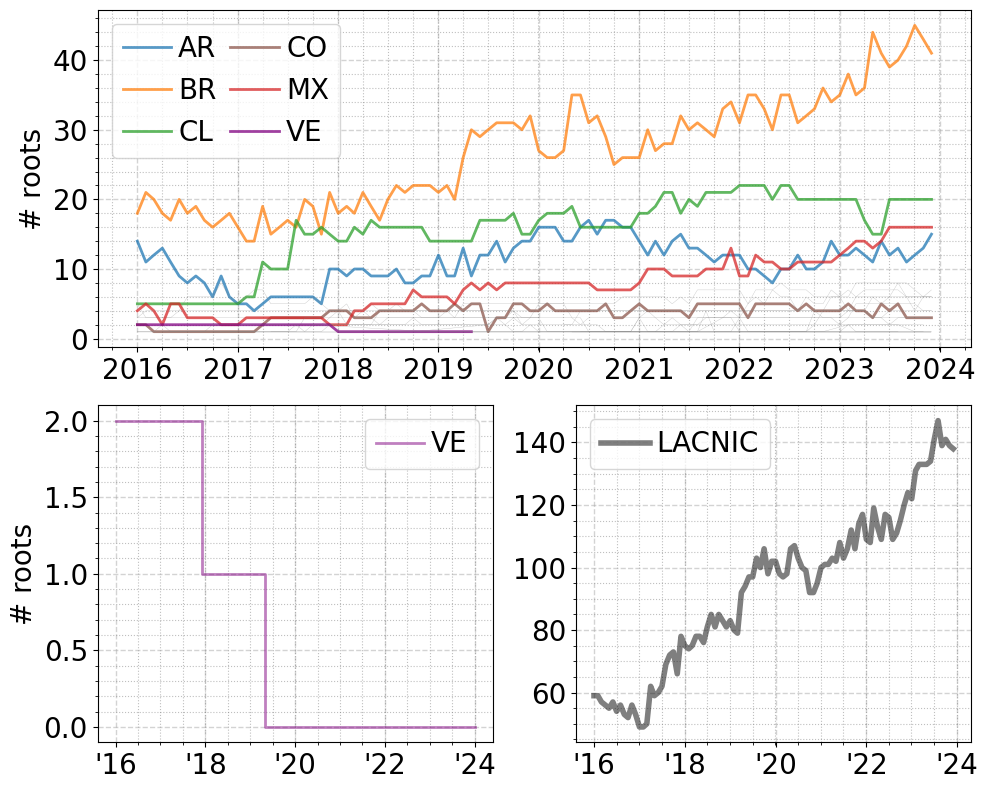

In [7]:
fig = plt.figure(figsize=(10, 8))

gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

i = 0
for cc in chaos.drop_duplicates("cc")["cc"].values:
    tmp = (
        chaos.drop_duplicates(["date", "string", "cc"])
        .loc[chaos["cc"] == cc]
        .groupby("date")["string"]
        .count()
        .reset_index()
    )

    country_styles
    ax1.plot_date(
        tmp["date"],
        tmp["string"],
        label=country_styles[cc]["label"],
        xdate=True,
        ydate=False,
        tz="UTC",
        alpha=country_styles[cc]["alpha"],
        lw=country_styles[cc]["lw"],
        fmt="-",
        marker="None",
        color=country_styles[cc]["color"],
    )

ax1.set_ylabel("# roots", fontsize=20)
ax1.tick_params(labelsize=20)
ax1.legend(
    loc="upper left",
    ncol=2,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax1.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax1.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax1.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax1.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_minor_locator(AutoMinorLocator())

###
tmp = (
    chaos.drop_duplicates(["date", "string", "cc"])
    .loc[chaos["cc"] == "VE"]
    .groupby("date")["string"]
    .count()
    .reset_index()
)

tmp = pd.concat(
    [
        tmp,
        pd.DataFrame(
            [{"date": datetime.strptime(f"2024/1/1", "%Y/%m/%d"), "string": 0}]
        ),
    ]
)

ax2.plot_date(
    tmp["date"],
    tmp["string"],
    xdate=True,
    ydate=False,
    tz="UTC",
    alpha=0.5,
    lw=2,
    fmt="-",
    marker="None",
    color=f"purple",
    label=f"VE",
    drawstyle="steps-pre",
)

ax2.set_ylabel("# roots", fontsize=20)
ax2.tick_params(labelsize=20)
ax2.legend(
    loc="upper right",
    ncol=2,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax2.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax2.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax2.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax2.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

ax2.xaxis.set_major_formatter(DateFormatter("'%y"))
ax2.xaxis.set_major_locator(mdates.YearLocator(2))


###
tmp = (
    chaos.drop_duplicates(["date", "string"])
    .groupby("date")["string"]
    .count()
    .reset_index()
)


ax3.plot_date(
    tmp["date"],
    tmp["string"],
    xdate=True,
    ydate=False,
    tz="UTC",
    alpha=0.5,
    lw=4,
    fmt="-",
    marker="None",
    color=f"black",
    label=f"LACNIC",
)

ax3.tick_params(labelsize=20)
ax3.legend(
    loc="upper left",
    ncol=2,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax3.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax3.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax3.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax3.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.xaxis.set_minor_locator(AutoMinorLocator())

ax3.xaxis.set_major_formatter(DateFormatter("'%y"))
ax3.xaxis.set_major_locator(mdates.YearLocator(2))

fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig("figures/06-chaos_txt.pdf")

The figure displays three sections showing the evolution of unique CHAOS TXT strings containing geolocation tags for countries in the region.

The top graph shows a country-level comparison, including Venezuela and the same subset of similar countries in colors and the remaining countries in the region in grey. The bottom left section focuses on Venezuela and the evolution of CHAOS TXT strings mapped to the country, while the bottom right section aggregates CHAOS TXT strings associated with the entire region.


In [8]:
chaos.drop_duplicates(["string"]).loc[chaos["cc"] == "VE"]

,cc,date,string,city,lat-lon
57,VE,2016-01-01,ccs01.l.root-servers.org,Vargas,"10.601194,-66.991222"
58,VE,2016-01-01,ccs1a.f.root-servers.org,Vargas,"10.601194,-66.991222"
2367,VE,2018-12-01,aa.ve-mai.l.root,Maiquetía,"10.6,-66.95"


In [9]:
chaos.loc[chaos["cc"] == "VE"]

,cc,date,string,city,lat-lon
57,VE,2016-01-01,ccs01.l.root-servers.org,Vargas,"10.601194,-66.991222"
58,VE,2016-01-01,ccs1a.f.root-servers.org,Vargas,"10.601194,-66.991222"
116,VE,2016-02-01,ccs01.l.root-servers.org,Vargas,"10.601194,-66.991222"
117,VE,2016-02-01,ccs1a.f.root-servers.org,Vargas,"10.601194,-66.991222"
173,VE,2016-03-01,ccs01.l.root-servers.org,Vargas,"10.601194,-66.991222"
...,...,...,...,...,...
2367,VE,2018-12-01,aa.ve-mai.l.root,Maiquetía,"10.6,-66.95"
2450,VE,2019-01-01,aa.ve-mai.l.root,Maiquetía,"10.6,-66.95"
2609,VE,2019-03-01,aa.ve-mai.l.root,Maiquetía,"10.6,-66.95"
2701,VE,2019-04-01,aa.ve-mai.l.root,Maiquetía,"10.6,-66.95"


In [10]:
# Compare root DNS server count for the dataset's first date and last date, and the growth rate
for cc in ["AR", "BR", "MX", "CL", "CO", "VE"]:
    tmp = (
        chaos.drop_duplicates(["date", "string", "cc"])
        .loc[chaos["cc"] == cc]
        .groupby("date")["string"]
        .count()
        .reset_index()
    )
    tmp = tmp.sort_values("date")
    print(
        cc,
        tmp["string"].iloc[0],
        tmp["string"].iloc[-1],
        f'{tmp["string"].iloc[-1] / tmp["string"].iloc[0]:.2f}',
    )

AR 14 15 1.07
BR 18 41 2.28
MX 4 16 4.00
CL 5 20 4.00
CO 2 3 1.50
VE 2 1 0.50


In [11]:
tmp = (
    chaos.drop_duplicates(["date", "string"])
    .groupby("date")["string"]
    .count()
    .reset_index()
)
print(
    "LACNIC",
    tmp["string"].iloc[0],
    tmp["string"].iloc[-1],
    f'{tmp["string"].iloc[-1] / tmp["string"].iloc[0]:.2f}',
)

LACNIC 59 138 2.34


Our analysis shows a notable increase in the hosting of domestic root DNS servers within the LACNIC region since the beginning of these measurements in 2016.Overall, during this period the region has seen a 2.34-fold rise in replicas, from 59 to 138. 

Individual countries, such as Mexico and Chile showed significant growth, with the number of replicas increasing from 4 to 16 and from 5 to 20, respectively. Brazil experienced a remarkable surge from 18 to 41 replicas, while Argentina only added one server to the count, starting from a relatively strong position of 14 servers.

In contrast, our latest data shows the absence of any root DNS servers in Venezuela. In fact, the country has seen a regression on this front. Our analysis found that initially, two root DNS servers, one L (ccs01.l.root-servers.org) and one F (ccs1a.f.root-servers.org), were geolocated in Caracas. These servers later disappeared from the measurements and were replaced by another L DNS server in Maracaibo (aa.ve-mai.l.root). 

While the LACNIC’s +Raices report states that Venezuela hosts two L-root and one F- root servers, the current availability of these services in Venezuela remains uncertain. 

Our recent measurements showed that Venezuela predominantly relies on overseas resources for DNS services. Most of these servers are located in the United States, followed by Great Britain, Germany, France, and the Netherlands. In Latin America, Brazil, Colombia, and Mexico are the primary alternatives for DNS services, with Panama, Chile, and Argentina serving as secondary options. 

Interestingly, Colombia emerged as a prevalent alternative when Venezuela’s local DNS resources disappeared.

While our analysis is based on data collected by RIPE Atlas, the results cannot be attributed to a lack of coverage in Venezuela. Throughout this period, Venezuela consistently maintained between 10 to 20 probes, experiencing an increase from 10 to 30 in the last two years. In our latest assessments, Venezuela is ranked as the 6th highest country in the LACNIC region in terms of the number of RIPE Atlas probes. The platform’s footprint in the country also spans other local networks beyond CANTV, which only hosts 8 probes.